# 1. Instación de mmcv, mmdetection-v2 y detectors

---




*Es aconsejable reiniciar el entorno (CTRL + M) para que se aplique la instalación de las dependencias siguientes.*

In [ ]:
!pip uninstall torch

In [ ]:
# instalamos pytorch, torchvision y coco api
!pip install -U torch==1.5.0 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 

In [ ]:
!pip install mmcv-full==latest+torch1.5.0+cu101 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html

In [ ]:
%cd /content/
!git clone https://github.com/open-mmlab/mmdetection.git
%cd /content/mmdetection
!python setup.py develop

# 2. Detectando entidades

In [ ]:
%cd /content/
# descarga de los pesos y la configuración del modelo
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/detectors/cascade_rcnn_r50_sac_1x_coco/cascade_rcnn_r50_sac_1x_coco-24bfda62.pth -O model.pth
#!wget https://raw.githubusercontent.com/open-mmlab/mmdetection/master/configs/detectors/cascade_rcnn_r50_sac_1x_coco.py -O config.py

# descarga de la imagen
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

#%cd /content/mmdetection/
import os
config_path = '/content/mmdetection/configs/detectors/cascade_rcnn_r50_sac_1x_coco.py'
model_path = '/content/model.pth'

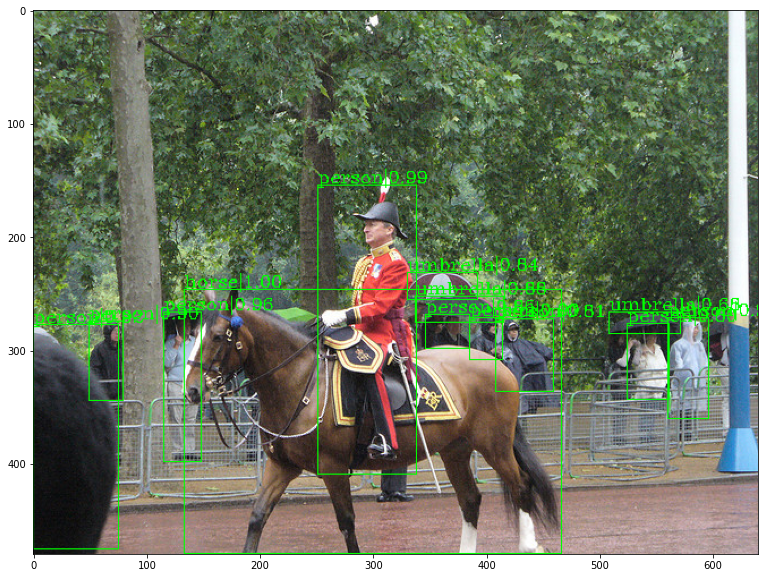

In [12]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

model = init_detector(config_path, model_path, device='cuda:0')
results = inference_detector(model, '/content/input.jpg')
show_result_pyplot(model, 'input.jpg', inference_detector(model, 'input.jpg'), score_thr=0.5)
